# Beacon SES data from the Dungog East Coast Low

This notebook imports and explores the cleaned up data from the Beacon SES call outs for the Dungog East Coast Low event. The data have been cleaned to fix errors in lat/lon.

The working directory for this project is: 

\\nas\gemd\georisk\HaRIA_B_Wind\projects\impact_forecasting\data\exposure\NSW\NSW_SES

*Date: September 2017, Creator: Claire Krause*

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import seaborn as sns
import collections
sns.set_context("poster")

# Start by reading in an exploring the dataset

In [44]:
filename = "//nas/gemd/georisk/HaRIA_B_Wind/projects/impact_forecasting/data/exposure/NSW/NSW_SES/Beacon_data_cleaned.csv"
df = pd.read_csv(filename)
df

,FID,Identifier,Latitude,Longitude,JobReceive,Priority,Type,SituationO,Unnamed: 8,Headquarte,...,Tag5,Tag6,Tag7,Tag8,Tag9,Tag10,Tag11,Tag12,Tag13,Tag14
0,0,0005-1377,0.00000,0.00000,Wed Apr 22 2015 14:00:00 GMT+1000 (AUS Eastern...,General,Resupply,,NaN,DNG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0005-1376,-34.09915,150.70236,Wed Apr 22 2015 14:00:00 GMT+1000 (AUS Eastern...,General,Resupply,"Needs Fuel 2 stroke, Bread and Milk (NO POWER)",NaN,DNG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0005-0483,-32.46825,151.96215,Wed Apr 22 2015 10:00:00 GMT+1000 (AUS Eastern...,General,Storm,,NaN,STO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0004-8482,-33.54636,151.01153,Mon Apr 20 2015 12:09:00 GMT+1000 (AUS Eastern...,General,Storm,,NaN,HBY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0004-7310,-32.80957,151.65602,Sun Apr 26 2015 17:10:00 GMT+1000 (AUS Eastern...,General,Storm,Large tree down on fence,NaN,NTL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,0004-7308,-32.81174,151.65284,Sun Apr 26 2015 14:30:00 GMT+1000 (AUS Eastern...,General,Storm,Tree has fallen on RMS land as well as back ya...,NaN,NTL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,0004-6551,-31.19264,152.82332,Mon Apr 27 2015 23:23:07 GMT+1000 (AUS Eastern...,Rescue,RCR,"car vs truck, Possible pers trapped under truck",NaN,KPS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,0004-6547,-32.81209,151.48216,Mon Apr 27 2015 20:43:04 GMT+1000 (AUS Eastern...,General,Storm,MASSIVE TREE LEANT OVER AJOINING NIEGHBOURS YA...,NaN,CES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,0004-6546,-32.99282,151.67283,Mon Apr 27 2015 15:00:00 GMT+1000 (AUS Eastern...,General,Storm,Either 8 or 10 Schaefer's Close unknown due to...,NaN,LMQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,0004-6545,-32.75722,151.75777,Mon Apr 27 2015 20:31:17 GMT+1000 (AUS Eastern...,General,Storm,Large branches from neighbouring property over...,NaN,PTS,...,Yard,Shed / Workshop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### List of column headings

In [11]:
df.columns

Index([u'FID', u'Identifier', u'Latitude', u'Longitude', u'JobReceive',
       u'Priority', u'Type', u'SituationO', u'Unnamed: 8', u'Headquarte',
       u'Region', u'Address_St', u'Address_Lo', u'Address_Po', u'RASTERVALU',
       u'Tag0', u'Tag1', u'Tag2', u'Tag3', u'Tag4', u'Tag5', u'Tag6', u'Tag7',
       u'Tag8', u'Tag9', u'Tag10', u'Tag11', u'Tag12', u'Tag13', u'Tag14'],
      dtype='object')

## We need to convert the wind speed to a gust speed

In [46]:
df['RASTERVALU'] = df['RASTERVALU'] * 1.6

In [47]:
df[df.RASTERVALU <= 0.0000001] = np.nan

### How many entries do we have for each column?
I.e. not NaN. Note that this does not check the contents of the field, only that something was written into it

In [12]:
df.count()

FID           13794
Identifier    13794
Latitude      13794
Longitude     13794
JobReceive    13794
Priority      13794
Type          13794
SituationO    13793
Unnamed: 8        0
Headquarte    13794
Region        13794
Address_St    13794
Address_Lo    13794
Address_Po    13794
RASTERVALU    13794
Tag0          13794
Tag1           3986
Tag2           3186
Tag3           2497
Tag4           1884
Tag5           1320
Tag6            875
Tag7            579
Tag8            359
Tag9            204
Tag10            98
Tag11            47
Tag12            20
Tag13             6
Tag14             2
dtype: int64

# Beacon data for the Hunter Region ECL event:

* Number of data entries = 13796
* Lat/lon = 13491 (97.8%)
* SituationOnScene (free text description of call-out) = 12060 (87.4%)
* Tags (at least one) = 4487 (32.5%)

Key missing data:
* Damage state
* Property type and attributes

# Just do some quick cleaning up of the data

There are a number of blank fields throughout the data where a value was not entered into the dataset by the assessor. We need to keep track of the missing data, as well as the entered data, so we will find all 'NaN' values in the dataset, and change these to 'Not given' so we can include them in subsequent analyses. 

In [13]:
df = df.fillna('Not given')

# Consolidate the tags

## Does it include any information about the type of property?

In [14]:
has_type = df.isin(['Aged Care', 'Building', 'Caravan / Mobile Home', 'Commercial', 'Council Land', 'Council/Government',
                    'Crown Land', 'Day Care', 'Hospital', 'Public Housing', 'Residential', 'School', 'Terrace', 'Townhouse',
                    'Unit', 'Vacant Block']).any(1)
df['has_type'] = has_type
has_type.sum()

2047

## Has any building attributes?

In [15]:
has_attrs = df.isin(['1 Storey', '2 Storeys', '> 2 Storeys', 'Av Slope Roof', 'Colourbond', 'Fibro', 'Fibro/Asbestos',
                    'Flat Roof', 'Iron Roof', 'Slate Roof', 'Steep Roof', 'Tiled Roof', 'Veranda / Deck']).any(1)
df['has_attrs'] = has_attrs
has_attrs.sum()

1754

# Tally up all of the different tags

In [17]:
grouped = collections.Counter(df[['Tag0', 'Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5', 'Tag6', 'Tag7', 'Tag8', 
                      'Tag9', 'Tag10', 'Tag11', 'Tag12', 'Tag13', 'Tag14']].values.flatten())
grouped

Counter({' ': 12,
         '1 Storey': 1054,
         '2 Storeys': 518,
         '> 2 Storeys': 86,
         'Aged': 339,
         'Aged Care': 17,
         'Air Recon': 7,
         'Air Support': 4,
         'Animal': 1,
         'Animals': 657,
         'Assist Evac': 1,
         'Av Slope Roof': 460,
         'Basement': 6,
         'Bedroom': 141,
         'Blocked Drain': 10,
         'Branch Down': 387,
         'Branch Threatening': 301,
         'Bridge': 6,
         'Building': 784,
         'Building Collapse': 26,
         'Burst Gas': 3,
         'Burst Sewer': 7,
         'Burst Water': 6,
         'CES': 229,
         'COO': 452,
         'Car / Vehicle': 106,
         'Caravan / Mobile Home': 12,
         'Carer': 22,
         'Catering Transport': 1,
         'Cattle': 3,
         'Causeway': 2,
         'Ceiling Damage': 176,
         'Chain Sawing': 175,
         'Clean-up Assistance': 1,
         'Colourbond': 200,
         'Commercial': 43,
         'Council Land': 

## Grab any call outs relating to severe building damage
72 entries for severe building damage

In [18]:
severe_damage = df.loc[df.isin(['Building Collapse', 'Threat of Collapse']).any(1)]
severe_damage.shape

(72, 32)

## Grab any call outs relating to roof damage
1231 entries for roof damage

In [19]:
roof_damage = df.loc[df.isin(['Ceiling Damage', 'Leaking Roof', 'Roof Damage', 'Tarping']).any(1)]
roof_damage.shape

(1230, 32)

# Can we use the data to look for a threshold for damage caused by downed trees?

## Grab any call outs relating to downed trees
3337 entries for tree damage

In [20]:
tree_damage = df.loc[df.isin(['Branch Down', 'Branch Threatening', 'Tree Down', 'Tree Threatening']).any(1)]
tree_damage

,FID,Identifier,Latitude,Longitude,JobReceive,Priority,Type,SituationO,Unnamed: 8,Headquarte,...,Tag7,Tag8,Tag9,Tag10,Tag11,Tag12,Tag13,Tag14,has_type,has_attrs
2,2,0005-0483,-32.46825,151.96215,Wed Apr 22 2015 10:00:00 GMT+1000 (AUS Eastern...,General,Storm,,Not given,STO,...,Not given,Not given,Not given,Not given,Not given,Not given,Not given,Not given,False,False
3,3,0004-8482,-33.54636,151.01153,Mon Apr 20 2015 12:09:00 GMT+1000 (AUS Eastern...,General,Storm,,Not given,HBY,...,Not given,Not given,Not given,Not given,Not given,Not given,Not given,Not given,False,False
4,4,0004-7310,-32.80957,151.65602,Sun Apr 26 2015 17:10:00 GMT+1000 (AUS Eastern...,General,Storm,Large tree down on fence,Not given,NTL,...,Not given,Not given,Not given,Not given,Not given,Not given,Not given,Not given,False,False
5,5,0004-7308,-32.81174,151.65284,Sun Apr 26 2015 14:30:00 GMT+1000 (AUS Eastern...,General,Storm,Tree has fallen on RMS land as well as back ya...,Not given,NTL,...,Not given,Not given,Not given,Not given,Not given,Not given,Not given,Not given,True,False
7,7,0004-6547,-32.81209,151.48216,Mon Apr 27 2015 20:43:04 GMT+1000 (AUS Eastern...,General,Storm,MASSIVE TREE LEANT OVER AJOINING NIEGHBOURS YA...,Not given,CES,...,Not given,Not given,Not given,Not given,Not given,Not given,Not given,Not given,False,False
8,8,0004-6546,-32.99282,151.67283,Mon Apr 27 2015 15:00:00 GMT+1000 (AUS Eastern...,General,Storm,Either 8 or 10 Schaefer's Close unknown due to...,Not given,LMQ,...,Not given,Not given,Not given,Not given,Not given,Not given,Not given,Not given,True,False
9,9,0004-6545,-32.75722,151.75777,Mon Apr 27 2015 20:31:17 GMT+1000 (AUS Eastern...,General,Storm,Large branches from neighbouring property over...,Not given,PTS,...,Not given,Not given,Not given,Not given,Not given,Not given,Not given,Not given,True,False
10,10,0004-6544,-32.99320,151.67252,Mon Apr 27 2015 20:23:37 GMT+1000 (AUS Eastern...,General,Storm,Hanging limb requires removal by tree arborist.,Not given,LMQ,...,Not given,Not given,Not given,Not given,Not given,Not given,Not given,Not given,True,False
11,11,0004-6543,-32.99011,151.65586,Mon Apr 27 2015 20:05:21 GMT+1000 (AUS Eastern...,General,Storm,Owner requested to inform insurance company.,Not given,LMQ,...,Not given,Not given,Not given,Not given,Not given,Not given,Not given,Not given,True,False
12,12,0004-6541,-33.80005,151.12886,Mon Apr 20 2015 20:11:00 GMT+1000 (AUS Eastern...,General,Storm,Branches on road,Not given,RYD,...,Not given,Not given,Not given,Not given,Not given,Not given,Not given,Not given,False,False


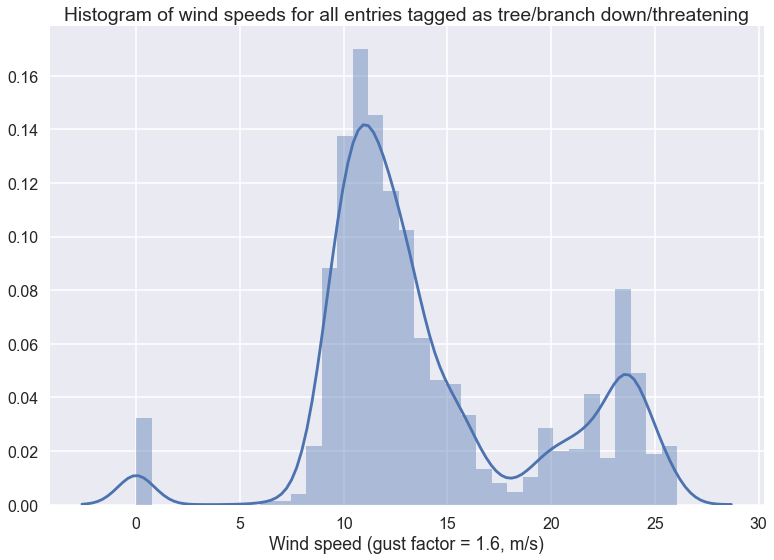

In [50]:
sns.distplot(tree_damage.RASTERVALU)
plt.title('Histogram of wind speeds for all entries tagged as tree/branch down/threatening')
plt.xlabel('Wind speed (gust factor = 1.6, m/s)')

### Can we also use the free text field to identify tree-related call outs?

In [22]:
tree_text = df[df['SituationO'].str.contains('tree')]
tree_text.shape

(5059, 32)

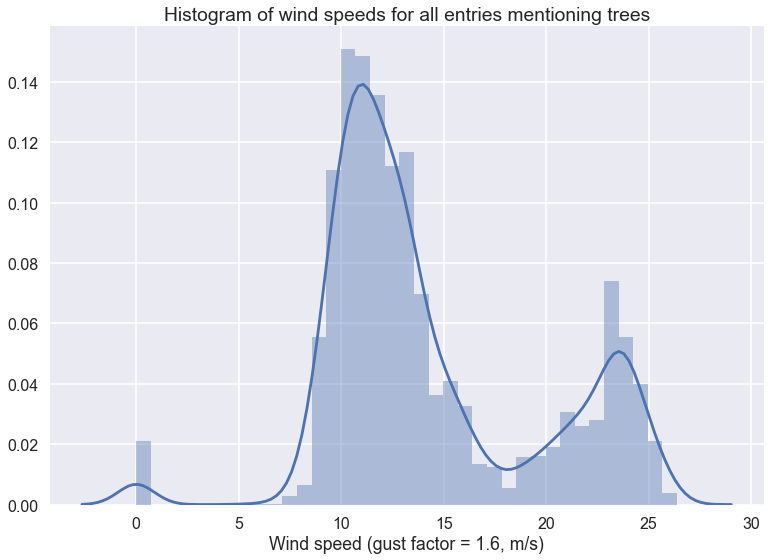

In [49]:
sns.distplot(tree_text.RASTERVALU)
plt.title('Histogram of wind speeds for all entries mentioning trees')
plt.xlabel('Wind speed (gust factor = 1.6, m/s)')